In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from collections import Counter

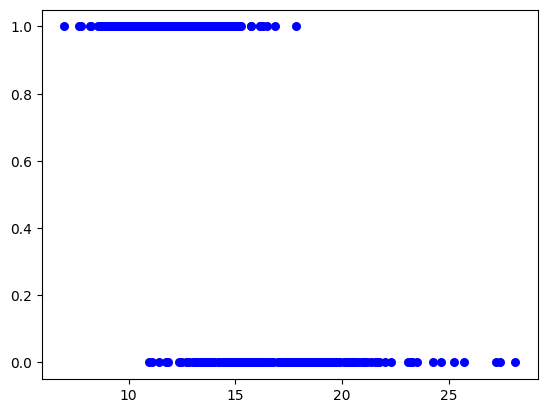

In [2]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:, 0], y, color='b', marker='o', s=30)

In [3]:
class LogisticRegression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1/n_samples)*np.dot(X.T, (y_predicted-y))
            db = (1/n_samples)*np.sum(y_predicted-y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_class
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [4]:
def accuracy(y_true, y_pred):
    acc = np.sum(y_pred == y_true) / len(y_true)
    return acc

In [6]:
regressor = LogisticRegression(lr=0.00001)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
acc = accuracy(y_test, predicted)
print(acc)

0.9210526315789473
